In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

%matplotlib inline

## Read the file

In [2]:
df=pd.read_csv("US Accidents.csv")

In [3]:
df.head(5)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day


# Data Exploration

## Calling Calling info() on our dataset tells us tons of information about our data frame like the data type of our features, and the memory usage.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516064 entries, 0 to 1516063
Data columns (total 47 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     1516064 non-null  object 
 1   Severity               1516064 non-null  int64  
 2   Start_Time             1516064 non-null  object 
 3   End_Time               1516064 non-null  object 
 4   Start_Lat              1516064 non-null  float64
 5   Start_Lng              1516064 non-null  float64
 6   End_Lat                1516064 non-null  float64
 7   End_Lng                1516064 non-null  float64
 8   Distance(mi)           1516064 non-null  float64
 9   Description            1516064 non-null  object 
 10  Number                 469969 non-null   float64
 11  Street                 1516064 non-null  object 
 12  Side                   1516064 non-null  object 
 13  City                   1515981 non-null  object 
 14  County            

## Statistical description of each columns

In [5]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,4.699690e+05,1.473031e+06,1.066748e+06,1.470555e+06,1.479790e+06,1.471853e+06,1.387202e+06,1.005515e+06
mean,2.238630e+00,3.690056e+01,-9.859919e+01,3.690061e+01,-9.859901e+01,5.872617e-01,8.907533e+03,5.958460e+01,5.510976e+01,6.465960e+01,2.955495e+01,9.131755e+00,7.630812e+00,8.477855e-03
std,6.081481e-01,5.165653e+00,1.849602e+01,5.165629e+00,1.849590e+01,1.632659e+00,2.242190e+04,1.827316e+01,2.112735e+01,2.325986e+01,1.016756e+00,2.889112e+00,5.637364e+00,1.293168e-01
min,1.000000e+00,2.457022e+01,-1.244976e+02,2.457011e+01,-1.244978e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.385422e+01,-1.182076e+02,3.385420e+01,-1.182077e+02,0.000000e+00,1.212000e+03,4.700000e+01,4.080000e+01,4.800000e+01,2.944000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.735113e+01,-9.438100e+01,3.735134e+01,-9.437987e+01,1.780000e-01,4.000000e+03,6.100000e+01,5.700000e+01,6.800000e+01,2.988000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.072593e+01,-8.087469e+01,4.072593e+01,-8.087449e+01,5.940000e-01,1.010000e+04,7.300000e+01,7.100000e+01,8.400000e+01,3.004000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.706000e+02,1.130000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01


## Understanding Numerical values

In [6]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numerical = df.select_dtypes(include=numerics)
numerical.columns

Index(['Severity', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng',
       'Distance(mi)', 'Number', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)'],
      dtype='object')

## Understanding Categorical values

In [7]:
categorical = ['object','bool']

categorical = df.select_dtypes(include=categorical)
categorical.columns

Index(['ID', 'Start_Time', 'End_Time', 'Description', 'Street', 'Side', 'City',
       'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Wind_Direction', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

# Data Preparation !!!

## Finding out the null values in each column

In [8]:
df.isnull().sum().sort_values(ascending=False)

Number                   1046095
Precipitation(in)         510549
Wind_Chill(F)             449316
Wind_Speed(mph)           128862
Humidity(%)                45509
Visibility(mi)             44211
Weather_Condition          44007
Temperature(F)             43033
Wind_Direction             41858
Pressure(in)               36274
Weather_Timestamp          30264
Airport_Code                4248
Timezone                    2302
Zipcode                      935
Sunrise_Sunset                83
Civil_Twilight                83
Nautical_Twilight             83
Astronomical_Twilight         83
City                          83
Country                        0
Give_Way                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Turning_Loop                   0
Traffic_Signal                 0
Traffic_Calming                0
Stop                           0
Station                        0
Roundabout                     0
Railway   

## Percentage of missing values in each column

In [9]:
missing_values=df.isnull().sum().sort_values(ascending=False)
missing_percentage=missing_values[missing_values!=0]/len(df)*100
missing_percentage

Number                   69.000715
Precipitation(in)        33.675953
Wind_Chill(F)            29.637007
Wind_Speed(mph)           8.499773
Humidity(%)               3.001786
Visibility(mi)            2.916170
Weather_Condition         2.902714
Temperature(F)            2.838469
Wind_Direction            2.760965
Pressure(in)              2.392643
Weather_Timestamp         1.996222
Airport_Code              0.280199
Timezone                  0.151841
Zipcode                   0.061673
Sunrise_Sunset            0.005475
Civil_Twilight            0.005475
Nautical_Twilight         0.005475
Astronomical_Twilight     0.005475
City                      0.005475
dtype: float64

## Visualize Missing Values with Missingno 
#### Missingno library takes it one step further and provides the distribution of missing values in the dataset by informative visualizations.

In [10]:
! pip install missingno

In [11]:
import missingno as msno
%matplotlib inline

<AxesSubplot:>

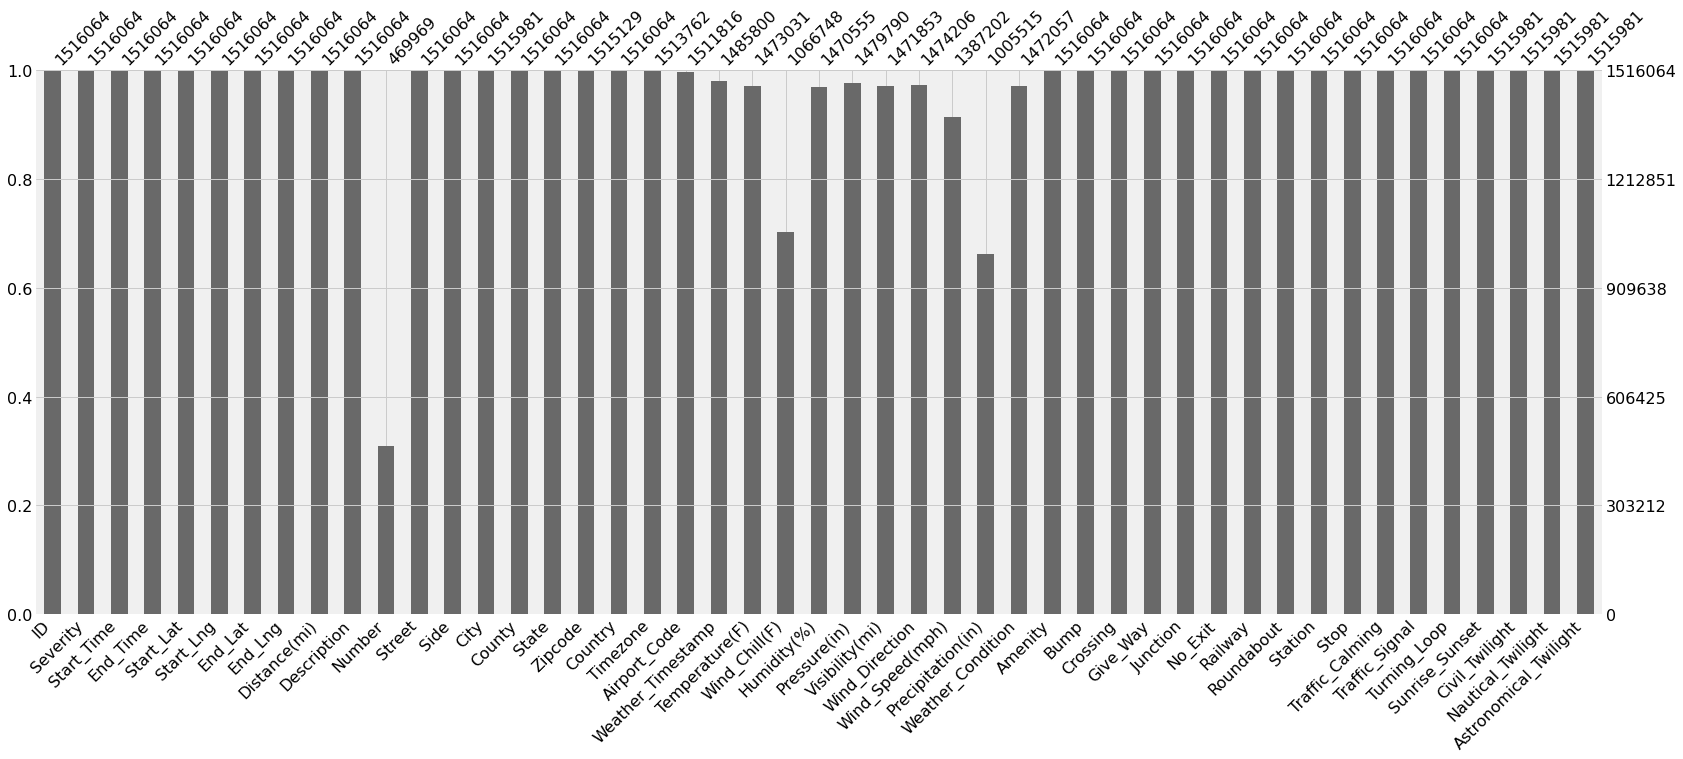

In [12]:
msno.bar(df)

#### It shows bars that are proportional to the number of non-missing values as well as providing the actual number of non-missing values. We get an idea of how much of each column is missing.

#### The columns ‘Number’, ‘Precipitation(in)’ and ‘Wind_Chill(F)’ have the most missing values. It is better to either drop the columns or exclude them from the analysis.

# Exploratory Data Analysis and Visualization

## 1. States by Accidents

In [13]:
states_by_accident = df.State.unique()
states_by_accident

array(['OH', 'IN', 'KY', 'WV', 'MI', 'PA', 'CA', 'NV', 'MN', 'TX', 'MO',
       'CO', 'OK', 'LA', 'KS', 'WI', 'IA', 'MS', 'NE', 'ND', 'WY', 'SD',
       'MT', 'NM', 'AR', 'IL', 'NJ', 'GA', 'FL', 'NY', 'CT', 'RI', 'SC',
       'NC', 'MD', 'MA', 'TN', 'VA', 'DE', 'DC', 'ME', 'AL', 'NH', 'VT',
       'AZ', 'UT', 'ID', 'OR', 'WA'], dtype=object)

#### From the above we can see that: 
1. Number of States in Dataset: 49 
2. Total no of states in US: 50

<AxesSubplot:>

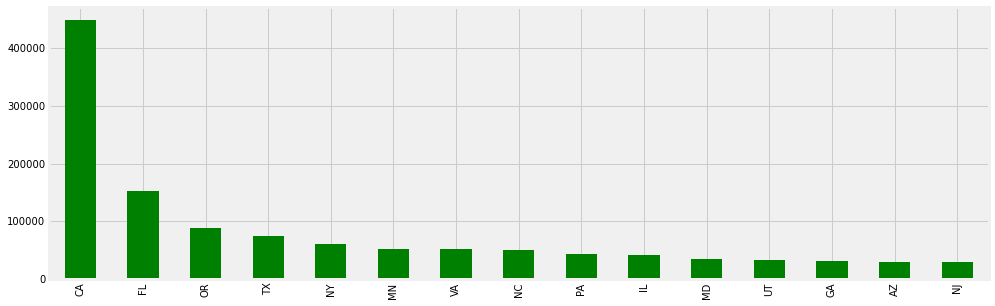

In [14]:
states_by_accident = df.State.value_counts()
states_by_accident[:15].plot(kind = 'bar', figsize=(15,5),color='green')

#### Lot of accidents have occured in California, which is the highest resident population state in US
#### Significant number of accidents have also occured in Florida Oregon, Texas, etc states in US.

##  2. Cities by accidents

In [15]:
print("City Code: ", df.City.unique())
print("Total No. of Cities in Dataset: ", len(df.City.unique()))

City Code:  ['Dublin' 'Dayton' 'Cincinnati' ... 'Succasunna' 'Valleyford'
 'American Fork-Pleasant Grove']
Total No. of Cities in Dataset:  10658


#### 1. No of cities in Dataset: 10,658
#### 2. Total no of cities incorporated in US:19,495

<AxesSubplot:>

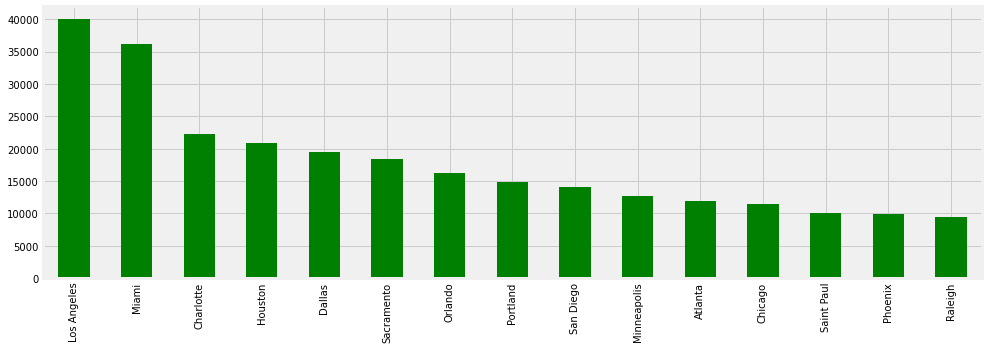

In [16]:
cities_by_accident = df.City.value_counts()
cities_by_accident[:15].plot(kind = 'bar', figsize=(15,5), color='green')

#### Los Angeles and Miami are top 2 cities by accidents which are in order with States: California and Florida

## 3. Distribution of cities by the number of accidents

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='City', ylabel='Density'>

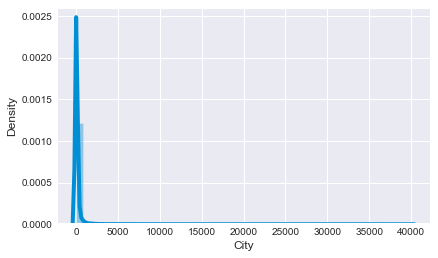

In [17]:
sns.set_style("darkgrid")
sns.distplot(cities_by_accident)

#### It seems like most of the cities have very few accidents less than 2000. Let’s break cities by accidents into two groups and see their respective distributions:

#### 1. High accident cities where the number of accidents is greater and equal to 1000
#### 2. Low accident cities where the number is less than 1000.

## 5. Percentage of high accident cities

In [18]:
high_accident_cities = cities_by_accident[cities_by_accident >= 1000]
len(high_accident_cities) / len(df.City.unique())*100

2.3550384687558643

<AxesSubplot:xlabel='City', ylabel='Count'>

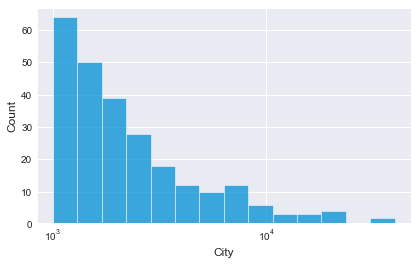

In [19]:
sns.histplot(high_accident_cities, log_scale = True)

#### 2.35% of cities have accidents greater than or equal to 1000

## 6. Percentage of low accident cities

In [20]:
low_accident_cities = cities_by_accident[cities_by_accident < 1000]
len(low_accident_cities) / len(df.City.unique())*100

97.63557890786264

<AxesSubplot:xlabel='City', ylabel='Count'>

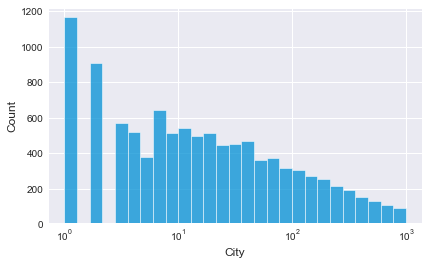

In [21]:
sns.histplot(low_accident_cities, log_scale = True)

#### 97% of cities have accidents less than 1000
#### It seems like most of the cities have 0-100 accidents, most of them indicate 0 accidents which might be wrong, there could be a possibility of missing data.
#### Also, about 1150 cities have no data or may be have had just one accident. 

In [22]:
cities_by_accident[cities_by_accident == 1]

Yoe               1
Hotevilla         1
Fort Peck         1
Bent              1
Spalding          1
                 ..
Vilonia           1
Burnett           1
Rayland           1
Prosper           1
Mammoth Spring    1
Name: City, Length: 1167, dtype: int64

#### From the above it is clear that about 1167 of cities have witnessed only one accidents which needs further investigation

## 7.What time of the day are accidents most frequent in

In [23]:
df.Start_Time.head(5)

0    2016-02-08 00:37:08
1    2016-02-08 05:56:20
2    2016-02-08 06:15:39
3    2016-02-08 06:15:39
4    2016-02-08 06:51:45
Name: Start_Time, dtype: object

In [24]:
df.Start_Time = pd.to_datetime(df.Start_Time) # Converting to timestamp
df.Start_Time.head(5)

0   2016-02-08 00:37:08
1   2016-02-08 05:56:20
2   2016-02-08 06:15:39
3   2016-02-08 06:15:39
4   2016-02-08 06:51:45
Name: Start_Time, dtype: datetime64[ns]

In [25]:
df.Start_Time.dt.hour.head(5) # Extract hour from timestamp

0    0
1    5
2    6
3    6
4    6
Name: Start_Time, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time'>

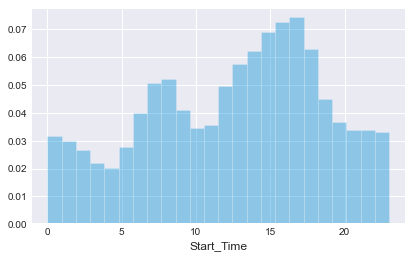

In [26]:
sns.distplot(df.Start_Time.dt.hour, bins = 24, kde=False, norm_hist=True)

#### The accidents are more frequent during  3pm to 6pm 

## 8. Which days of the week have the most accidents?

<AxesSubplot:xlabel='Start_Time'>

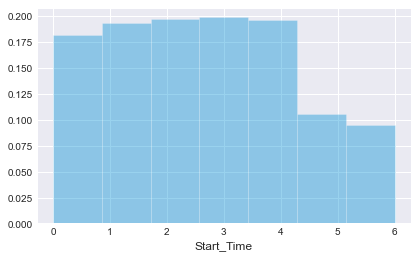

In [27]:
sns.distplot(df.Start_Time.dt.dayofweek, bins=7, kde=False, norm_hist=True)

#### From the above you can infer that it is evenly distribited on weekdays and accidents are lower on weekends.

### Is the distribution of accidents by hour the same on weekends as on weekdays?

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time'>

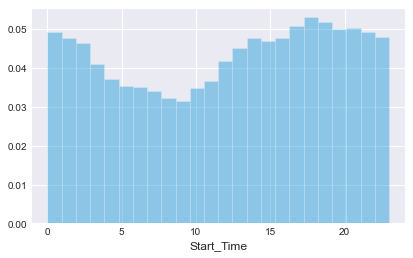

In [28]:
sundays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 6]
sns.distplot(sundays_start_time.dt.hour, bins=24, kde=False, norm_hist=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time'>

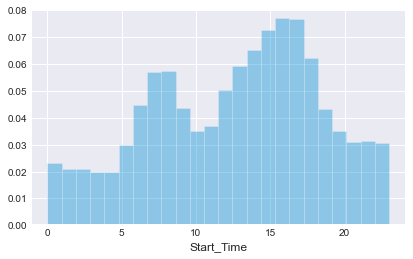

In [29]:
monday_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 0]
sns.distplot(monday_start_time.dt.hour, bins=24, kde=False, norm_hist=True)

#### On Sundays, the peak occurs between after 3 pm and in the midnight, unlike weekdays

## 9. Number of accidents in a year

In [30]:
df['Year'] = df['Start_Time'].dt.year

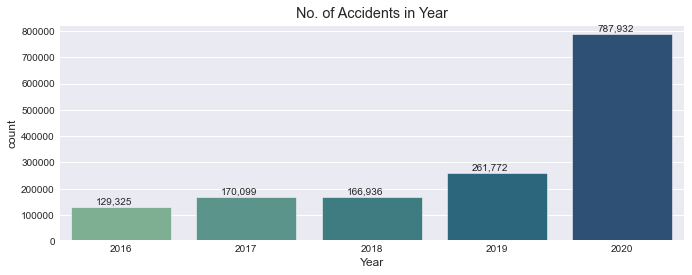

In [43]:
fig, ax = plt.subplots(figsize = (10,4))
c = sns.countplot(x="Year", data=df, orient = 'v', palette = "crest")
c.set_title("No. of Accidents in Year")
for i in ax.patches:
    count = '{:,.0f}'.format(i.get_height())
    x = i.get_x()+i.get_width()-0.60
    y = i.get_height()+10000
    ax.annotate(count, (x, y))
plt.show()

## 10. Monthly distribution of accidents

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time'>

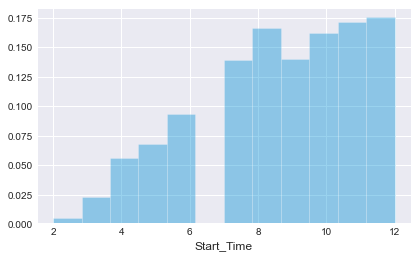

In [32]:
df_2016 = df[df.Start_Time.dt.year == 2016]
sns.distplot(df_2016.Start_Time.dt.month, bins = 12, kde=False, norm_hist=True)

#### The data is missing for the month of Jan and July although the data was collected from Feb 2016. 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time'>

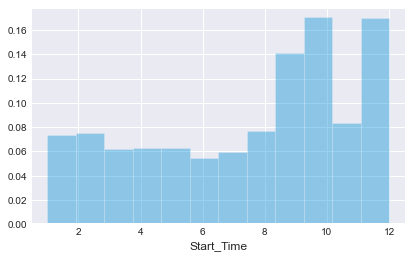

In [33]:
df_2016 = df[df.Start_Time.dt.year == 2019]
sns.distplot(df_2016.Start_Time.dt.month, bins = 12, kde=False, norm_hist=True)

#### 2019 does not show a consistent increase in accidents over the months. So, the overall picture might be misleading due to the significant numbers missing.

## 11. At what temperature most of the accidents occur?

In [34]:
df['Temperature(F)'].value_counts().head(5)

59.0    32387
63.0    31595
68.0    30898
57.0    30862
64.0    30778
Name: Temperature(F), dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Temperature(F)'>

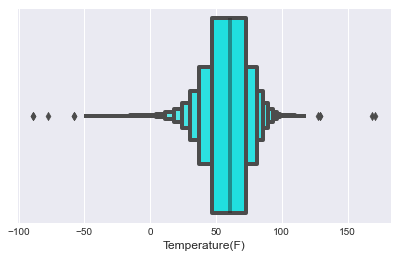

In [35]:
sns.boxenplot(df['Temperature(F)'], color='cyan', width=0.9)

#### Most of the accidents occur in the temperature 50 -60 degrees Farenheit

## 12. Severity of accidents

Text(0.5, 1.0, 'Degree of Severity')

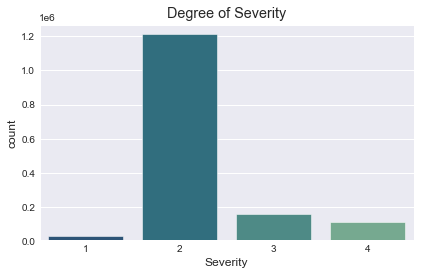

In [36]:
c=sns.countplot(x="Severity", data=df, orient = 'v', palette = "crest_r")
c.set_title("Degree of Severity")

## Insights Drawn

In [ ]:
### California and Florida are the top 2 States which has recorded highest number of accidents in US.
### The accidents are more frequent during 3pm to 6pm.
### Less than 2.35% of cities have accidents greater than or equal to 1000.
### About 1167 of cities have witnessed only one accidents which needs further investigation.
### The accidents are evenly distribited on weekdays and are lower on weekends.On Sundays, the peak occurs between after 3 pm and in the midnight, unlike weekdays
### Lot of accidents have happened in the year 2020 with 7.8 lakh accidents from the data collected from Feb 2016 to December 2020.
### Most of the accidents occur in the temperature 50-60 degrees Farenheit.
### 